In [212]:
import sys
sys.path.append("./googleplaystoreapps")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd
from sklearn import preprocessing


In [213]:
data_app = pd.read_csv('googleplaystore.csv', sep=',')

In [214]:
pd.read_csv('googleplaystore.csv', sep=',',encoding="ISO-8859-1")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [109]:
data_app = pd.read_csv('googleplaystore2.csv', sep=';',encoding="ISO-8859-1")
print(data_app.shape)

head = data_app.columns
print(head)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [217]:
print(data_app.shape)

head = data_app.columns
print(head)


data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 50000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = "NaN"
    if data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = "nan"
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] == 1 
        #transforming numerical values to float        
        data_app_c[i][2] = float(data_app_c[i][2]) #Rating
        data_app_c[i][3] = float(data_app_c[i][3]) #Reviews
        data_app_c[i][4] = float(data_app_c[i][4]) #Size
        data_app_c[i][5] = int(data_app_c[i][5]) #Installs

        
le = preprocessing.LabelEncoder()
#encoding labels: category, type, content rating, genres
a = le.fit_transform(data_app_c.T[1]) #Category
data_app_c.T[1] = a
#b = le.fit_transform(data_app_c.T[6]) #Type
#data_app_c.T[6] = b
a = le.fit_transform(data_app_c.T[8]) #Content Rating
data_app_c.T[8] = a
a = le.fit_transform(data_app_c.T[9]) #Genres
data_app_c.T[9] = a



#delete the name category for everything
del_categories = [0, 7, 9, 10, 11, 12]
#head = np.delete(head, del_categories)
data_app_c = np.delete(data_app_c, del_categories, 1)



print(data_app_c[0])
print(head)


(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]


ValueError: could not convert string to float: '10,000+'

In [218]:
print(data_app.shape)

head = data_app.columns
print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    for char in data_app_c[i][5]:
        if char in " ?.!/;:+,":
            data_app_c[i][5] = data_app_c[i][5].replace(char,'')
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 50000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = float("NaN")
    elif data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = float("NaN")
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] = 1 
 
print(data_app_c[2])

(10841, 13)
----
0 App
1 Category
2 Rating
3 Reviews
4 Size
5 Installs
6 Type
7 Price
8 Content Rating
9 Genres
10 Last Updated
11 Current Ver
12 Android Ver
----
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [219]:
df = pd.DataFrame(data_app_c)

In [220]:
installs = df[5]

In [221]:
import seaborn as sns

Text(0.5, 1.0, 'Installs')

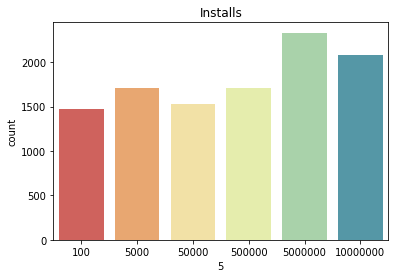

In [222]:
sns.countplot(installs, palette='Spectral').set_title("Installs")

reviews = df[3]

rating = df[2]
rating.isna().sum()

rating = rating.convert_objects(convert_numeric=True)

rating.fillna(rating.mean())

rating.describe()

sns.barplot(rating, palette="Spectral").set_title("Rating")

In [223]:
dataframe_app_c = pd.DataFrame(data_app_c)
dataframe_app_c.shape
dataframe_app_c.dtypes
dataframe_app_c_no_missing = dataframe_app_c.dropna()

# K-means clustering

/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


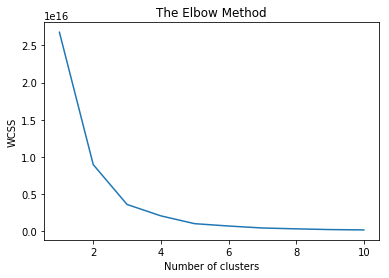

/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:49: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


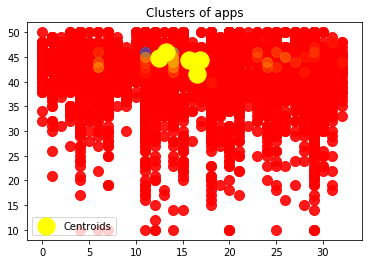

In [163]:
# K-Means Clustering

X = dataframe_app_c_no_missing


#REMOVED ABOVE: App object, Price object, Genres, Last Updated, Current Ver, Android Ver

#kmeans klustering with the following variables 
#Category           object
#Rating            float64
#Reviews            object
#Size               object
#Installs           object
#Type               object
#Content Rating     object


X = pd.DataFrame(X)
X = X.drop(X.columns[4], axis=1)
X = X.convert_objects(convert_numeric=True)
X.columns = ['Category', 'Rating', 'Reviews', 'Size', 'Type','Content Rating']
X= X.dropna()


# Eliminating null values
#for i in X.columns:
#    X[i] = X[i].fillna(int(X[i].mean()))
#for i in X.columns:
#    print(X[i].isnull().sum())
    

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the googleplaydata dataset
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red', alpha = .9)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue', alpha = .9)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green', alpha = .01)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s=100,c='orange', alpha = .1)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of apps')
plt.legend()
plt.show()

# K-medoids clustering

In [10]:
from kmedoids import kmedoids
from sklearn.metrics.pairwise import pairwise_distances

In [11]:
# K-Medoids Clustering

Y = dataframe_app_c


#REMOVED ABOVE: App object, Price object, Genres, Last Updated, Current Ver, Android Ver

#kmeans klustering with the following variables 
#Category           object
#Rating            float64
#Reviews            object
#Size               object
#Installs           object
#Type               object
#Content Rating     object


Y = pd.DataFrame(Y)
Y = Y.convert_objects(convert_numeric=True)
Y.columns = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']

# Eliminating null values
for i in Y.columns:
    Y[i] = Y[i].fillna(int(Y[i].mean()))
for i in Y.columns:
    print(Y[i].isnull().sum())
    


# 3 points in dataset
data = Y.values

# distance matrix
D = pairwise_distances(data, metric='euclidean')

# split into 4 clusters
M, C = kmedoids.kMedoids(D, 4)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))

/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


0
0
0
0
0
0
0
medoids:
[6.0000e+00 4.1000e+01 3.2283e+04 2.1000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
[8.000000e+00 4.700000e+01 6.290507e+06 2.100000e+01 1.000000e+07
 0.000000e+00 1.000000e+00]
[1.60000e+01 4.60000e+01 3.53799e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
[1.10e+01 4.40e+01 8.47e+02 2.10e+01 5.00e+05 0.00e+00 1.00e+00]

clustering result:
label 0:　[0.000e+00 4.700e+01 8.751e+04 8.700e+00 5.000e+06 0.000e+00 1.000e+00]
label 0:　[0.0000e+00 4.1000e+01 3.6815e+04 2.9000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[0.0000e+00 4.4000e+01 1.3791e+04 3.3000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[0.000e+00 4.400e+01 1.388e+04 2.800e+01 5.000e+06 0.000e+00 1.000e+00]
label 0:　[0.000e+00 4.400e+01 8.788e+03 1.200e+01 5.000e+06 0.000e+00 1.000e+00]
label 0:　[0.00000e+00 4.30000e+01 1.94216e+05 3.90000e+01 5.00000e+06 0.00000e+00
 1.00000e+00]
label 0:　[0.0000e+00 4.1000e+01 3.6639e+04 2.1000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.000e+00 4.000

 1.0000e+00]
label 0:　[2.700e+01 4.200e+01 7.913e+04 2.300e+01 5.000e+06 0.000e+00 4.000e+00]
label 0:　[2.7000e+01 4.0000e+01 3.3249e+04 8.4000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.700e+01 4.200e+01 7.913e+04 2.300e+01 5.000e+06 0.000e+00 4.000e+00]
label 0:　[2.6000e+01 4.3000e+01 3.8961e+04 2.7000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.6000e+01 4.4000e+01 3.5563e+04 4.2000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.60000e+01 4.20000e+01 1.06798e+05 3.00000e+01 5.00000e+06 0.00000e+00
 1.00000e+00]
label 0:　[2.60e+01 3.60e+01 8.82e+03 3.30e+01 5.00e+06 0.00e+00 1.00e+00]
label 0:　[2.6000e+01 4.5000e+01 3.7186e+04 7.9000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.6000e+01 4.4000e+01 2.5714e+04 1.2000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.600e+01 3.600e+01 3.656e+03 9.000e+00 5.000e+06 0.000e+00 4.000e+00]
label 0:　[2.60000e+01 4.30000e+01 2.16741e+05 2.10000e+01 5.00000e+06 0.00000e+00
 1.00000e+00]
label 0:　[2.6000e+01 4.5000e+01 3

 1.00000e+00]
label 0:　[2.1000e+01 4.0000e+01 1.5443e+04 2.5000e+01 5.0000e+06 0.0000e+00
 4.0000e+00]
label 0:　[1.1000e+01 4.4000e+01 6.3773e+04 8.8000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.2000e+01 3.9000e+01 1.0657e+04 5.8000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[6.0000e+00 4.3000e+01 2.7156e+04 6.6000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.50e+01 4.00e+01 4.66e+03 5.90e+00 5.00e+06 0.00e+00 1.00e+00]
label 0:　[2.5000e+01 4.5000e+01 7.5951e+04 2.1000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[3.0000e+00 4.1000e+01 8.5842e+04 3.7000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.2e+01 4.3e+01 9.4e+03 6.1e+00 5.0e+06 0.0e+00 1.0e+00]
label 0:　[2.4000e+01 4.2000e+01 1.2726e+04 1.5000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.1000e+01 4.3000e+01 6.4884e+04 3.7000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.4000e+01 4.4000e+01 1.2683e+04 1.9000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.50000e+01 4.60000e+01 2.67042e+0

 1.0000e+00]
label 0:　[1.4000e+01 4.6000e+01 1.5829e+04 9.5000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[2.90000e+01 4.50000e+01 1.01738e+05 1.00000e+01 5.00000e+06 0.00000e+00
 1.00000e+00]
label 0:　[1.100e+01 4.200e+01 3.345e+03 2.700e+01 5.000e+06 0.000e+00 1.000e+00]
label 0:　[1.4000e+01 4.0000e+01 4.2182e+04 3.4000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.100e+01 3.900e+01 3.847e+03 4.300e+00 5.000e+06 0.000e+00 1.000e+00]
label 0:　[1.4000e+01 3.9000e+01 8.5317e+04 4.5000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.4000e+01 4.1000e+01 9.7209e+04 6.7000e+00 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.100e+01 4.000e+01 4.518e+03 4.100e+01 5.000e+06 0.000e+00 1.000e+00]
label 0:　[1.1000e+01 3.7000e+01 1.1748e+04 3.6000e+01 5.0000e+06 0.0000e+00
 4.0000e+00]
label 0:　[1.1000e+01 4.1000e+01 1.1788e+04 6.2000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.1000e+01 4.4000e+01 2.3022e+04 8.0000e+01 5.0000e+06 0.0000e+00
 1.0000e+00]
label 0:　[1.4000e+01 3.30

 0.000000e+00 3.000000e+00]
label 2:　[6.000000e+00 4.300000e+01 2.451093e+06 2.100000e+01 1.000000e+07
 0.000000e+00 4.000000e+00]
label 2:　[6.00000e+00 4.20000e+01 1.71031e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.0000e+00 4.4000e+01 2.8765e+06 2.4000e+01 1.0000e+07 0.0000e+00
 1.0000e+00]
label 2:　[6.0000e+00 4.2000e+01 7.8181e+05 2.1000e+01 1.0000e+07 0.0000e+00
 1.0000e+00]
label 2:　[6.00000e+00 4.30000e+01 3.35646e+05 8.30000e+00 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.00000e+00 4.30000e+01 3.50154e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.00000e+00 4.50000e+01 3.49384e+05 8.20000e+00 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.00000e+00 4.30000e+01 3.46982e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.00000e+00 4.20000e+01 2.44863e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.00000e+00 4.50000e+01 3.30761e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[6.000000e

 1.0000e+00]
label 2:　[2.40000e+01 4.50000e+01 2.85788e+05 4.60000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[2.40000e+01 4.70000e+01 2.33039e+05 2.40000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[2.4000e+01 4.3000e+01 2.8578e+04 2.3000e+01 1.0000e+07 0.0000e+00
 1.0000e+00]
label 2:　[2.400000e+01 4.600000e+01 1.159058e+06 2.500000e+01 1.000000e+07
 0.000000e+00 1.000000e+00]
label 2:　[2.4000e+01 4.4000e+01 5.3421e+04 2.6000e+01 1.0000e+07 0.0000e+00
 1.0000e+00]
label 2:　[2.400000e+01 4.500000e+01 1.579287e+06 2.100000e+01 1.000000e+07
 0.000000e+00 1.000000e+00]
label 2:　[2.4000e+01 4.3000e+01 1.1688e+05 2.0000e+00 1.0000e+07 0.0000e+00
 1.0000e+00]
label 2:　[2.40000e+01 4.60000e+01 8.47159e+05 4.20000e+00 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[2.40000e+01 4.30000e+01 2.51951e+05 1.60000e+01 1.00000e+07 0.00000e+00
 3.00000e+00]
label 2:　[2.40000e+01 4.30000e+01 6.54418e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[2.40000e+01 4.20000e+01 

 1.00000e+00]
label 2:　[2.800000e+01 4.200000e+01 1.008012e+06 1.300000e+01 1.000000e+07
 0.000000e+00 1.000000e+00]
label 2:　[2.80000e+01 4.30000e+01 1.48083e+05 5.70000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[1.10000e+01 4.30000e+01 5.98975e+05 3.90000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[3.0000e+01 4.0000e+01 6.4164e+04 3.6000e+00 1.0000e+07 0.0000e+00
 1.0000e+00]
label 2:　[6.00000e+00 4.30000e+01 5.41661e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[3.200000e+01 4.400000e+01 2.052407e+06 2.100000e+01 1.000000e+07
 0.000000e+00 1.000000e+00]
label 2:　[1.90000e+01 4.40000e+01 6.16742e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[1.40000e+01 4.40000e+01 1.61637e+05 8.20000e+01 1.00000e+07 0.00000e+00
 3.00000e+00]
label 2:　[2.50000e+01 4.10000e+01 3.49151e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[2.90000e+01 3.80000e+01 1.69369e+05 2.10000e+01 1.00000e+07 0.00000e+00
 1.00000e+00]
label 2:　[1.10000e+

 3.0000e+00]
label 3:　[7.000e+00 3.900e+01 8.722e+03 1.300e+01 5.000e+05 0.000e+00 3.000e+00]
label 3:　[7.00e+00 1.90e+01 9.53e+02 1.90e+01 5.00e+05 0.00e+00 3.00e+00]
label 3:　[7.000e+00 3.500e+01 2.593e+03 5.000e+00 5.000e+05 0.000e+00 3.000e+00]
label 3:　[7.000e+00 2.500e+01 5.377e+03 1.900e+01 5.000e+05 0.000e+00 3.000e+00]
label 3:　[7.00e+00 3.90e+01 8.52e+02 2.70e+01 5.00e+05 0.00e+00 3.00e+00]
label 3:　[7.00e+00 3.40e+01 2.12e+02 3.00e+00 5.00e+05 0.00e+00 3.00e+00]
label 3:　[7.000e+00 3.800e+01 5.164e+03 2.500e+01 5.000e+05 0.000e+00 3.000e+00]
label 3:　[7.000e+00 4.200e+01 1.939e+03 2.100e+01 5.000e+05 0.000e+00 3.000e+00]
label 3:　[7.00e+00 2.50e+01 2.77e+02 5.70e+00 5.00e+05 0.00e+00 3.00e+00]
label 3:　[7.0e+00 2.8e+01 8.0e+01 5.5e+00 5.0e+05 0.0e+00 4.0e+00]
label 3:　[7.00e+00 4.10e+01 8.25e+02 2.10e+01 5.00e+05 0.00e+00 3.00e+00]
label 3:　[7.000e+00 3.500e+01 1.093e+03 5.800e+00 5.000e+05 0.000e+00 3.000e+00]
label 3:　[7.000e+00 3.300e+01 1.601e+03 3.800e+00 5.000e+05 0.00

label 3:　[ 20.   41.    0.    3.6 100.    0.    1. ]
label 3:　[ 20.  50.   2.  24. 100.   0.   1.]
label 3:　[ 20.  41.   0.  10. 100.   0.   1.]
label 3:　[ 20.  50.   4.  25. 100.   0.   1.]
label 3:　[ 20.  50.   2.  29. 100.   0.   1.]
label 3:　[ 20.  41.   3.  17. 100.   0.   1.]
label 3:　[ 20.  50.   3.  53. 100.   0.   1.]
label 3:　[ 20.  50.   2.  83. 100.   0.   1.]
label 3:　[ 20.   50.    1.    4.6 100.    0.    1. ]
label 3:　[ 20.   41.    0.    4.6 100.    0.    1. ]
label 3:　[ 20.  41.   0.  28. 100.   0.   1.]
label 3:　[ 20.  41.   0.  29. 100.   0.   1.]
label 3:　[ 20.  43.  10.  46. 100.   0.   1.]
label 3:　[2.0e+01 4.9e+01 2.8e+01 5.7e+00 5.0e+03 0.0e+00 1.0e+00]
label 3:　[ 20.   41.    0.    1.4 100.    0.    1. ]
label 3:　[ 20.  41.   1.  12. 100.   0.   1.]
label 3:　[ 20.   41.    5.    2.2 100.    0.    1. ]
label 3:　[ 20.  41.   0.  27. 100.   0.   1.]
label 3:　[ 20.  41.   0.  18. 100.   0.   1.]
label 3:　[ 20.  41.   0.  30. 100.   0.   1.]
label 3:　[ 20.   41.    

label 3:　[ 11.   48.    4.    3.6 100.    0.    4. ]
label 3:　[3.1e+01 2.2e+01 3.2e+01 3.3e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.10e+01 3.80e+01 1.56e+02 4.30e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[2.90e+01 3.10e+01 6.57e+02 2.10e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[2.40e+01 3.10e+01 1.33e+02 2.30e+00 5.00e+05 0.00e+00 1.00e+00]
label 3:　[2.900e+01 3.800e+01 4.264e+03 1.400e+01 5.000e+05 0.000e+00 1.000e+00]
label 3:　[1.90e+01 3.80e+01 1.14e+02 1.90e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[1.4000e+01 4.3000e+01 2.1107e+04 9.5000e+01 5.0000e+05 0.0000e+00
 1.0000e+00]
label 3:　[2.900e+01 3.600e+01 3.642e+03 2.900e+01 5.000e+05 0.000e+00 1.000e+00]
label 3:　[4.0e+00 4.6e+01 6.0e+01 2.1e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[2.9e+01 4.1e+01 2.0e+01 1.6e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[ 29.   45.    2.    3.9 100.    0.    1. ]
label 3:　[1.3e+01 1.8e+01 1.7e+01 3.1e+00 5.0e+05 0.0e+00 1.0e+00]
label 3:　[1.2e+01 4.7e+01 4.6e+02 1.2e+01 5.0e+05 0.0e+00 1.0e+00]
label 3:　[1.

label 3:　[1.100e+01 3.400e+01 2.445e+03 3.400e+01 5.000e+05 0.000e+00 1.000e+00]
label 3:　[1.1000e+01 4.6000e+01 7.3919e+04 4.0000e+01 5.0000e+05 0.0000e+00
 4.0000e+00]
label 3:　[1.10e+01 4.00e+01 5.32e+02 6.50e+00 5.00e+05 0.00e+00 1.00e+00]
label 3:　[1.400e+01 4.100e+01 2.628e+03 4.500e+01 5.000e+05 0.000e+00 4.000e+00]
label 3:　[1.400e+01 3.300e+01 2.717e+03 4.000e+00 5.000e+05 0.000e+00 4.000e+00]
label 3:　[1.400e+01 4.100e+01 7.728e+03 3.900e+01 5.000e+05 0.000e+00 4.000e+00]
label 3:　[1.40e+01 4.20e+01 2.18e+03 5.50e+01 5.00e+05 0.00e+00 2.00e+00]
label 3:　[1.4000e+01 4.5000e+01 1.6162e+04 9.9000e+01 5.0000e+05 0.0000e+00
 4.0000e+00]
label 3:　[1.40e+01 3.80e+01 5.96e+02 9.10e+01 5.00e+05 0.00e+00 4.00e+00]
label 3:　[1.400e+01 3.500e+01 1.976e+03 2.100e+01 5.000e+05 0.000e+00 4.000e+00]
label 3:　[1.400e+01 4.300e+01 6.698e+03 4.600e+01 5.000e+05 0.000e+00 2.000e+00]
label 3:　[1.4000e+01 4.6000e+01 2.1266e+04 4.5000e+01 5.0000e+05 0.0000e+00
 4.0000e+00]
label 3:　[1.400e+01 4.700

label 3:　[1.40e+01 4.00e+01 2.67e+02 4.00e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[1.90e+01 4.90e+01 1.24e+02 3.40e+00 5.00e+03 0.00e+00 1.00e+00]
label 3:　[ 14.  47.  21.   9. 100.   0.   1.]
label 3:　[  6.   41.    0.    4.3 100.    0.    1. ]
label 3:　[ 14.   41.    3.    2.9 100.    0.    1. ]
label 3:　[ 12.   41.    2.    6.9 100.    0.    1. ]
label 3:　[2.9e+01 4.3e+01 3.3e+01 1.0e+00 5.0e+03 0.0e+00 1.0e+00]
label 3:　[2.30e+01 4.20e+01 2.79e+02 1.10e+00 5.00e+05 0.00e+00 1.00e+00]
label 3:　[1.40e+01 4.10e+01 4.96e+02 3.90e+01 5.00e+05 0.00e+00 4.00e+00]
label 3:　[1.8e+01 3.2e+01 3.2e+02 3.1e+01 5.0e+05 0.0e+00 1.0e+00]
label 3:　[1.20e+01 4.20e+01 7.98e+02 2.90e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[2.90e+01 4.10e+01 7.83e+02 4.20e+00 5.00e+05 0.00e+00 1.00e+00]
label 3:　[  4.   49.   13.    5.3 100.    0.    1. ]
label 3:　[ 11.   41.    1.    1.7 100.    0.    1. ]
label 3:　[2.8e+01 3.7e+01 8.4e+01 6.3e+00 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.20e+01 3.50e+01 1.96e+02 2.70e+0

label 3:　[ 20.   41.    0.    5.1 100.    0.    1. ]
label 3:　[ 21.  41.   2.  22. 100.   0.   1.]
label 3:　[ 25.  41.   0.  21. 100.   0.   1.]
label 3:　[3.0e+01 4.1e+01 1.0e+00 1.8e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[ 25.  41.   0.  30. 100.   0.   1.]
label 3:　[ 18.  41.   0.  23. 100.   0.   1.]
label 3:　[ 18.  41.   0.  21. 100.   0.   1.]
label 3:　[1.1e+01 4.1e+01 5.7e+01 2.1e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[  4.  41.   0.  10. 100.   0.   1.]
label 3:　[2.900e+01 4.400e+01 4.901e+03 1.900e+00 5.000e+05 0.000e+00 1.000e+00]
label 3:　[2.90e+01 4.60e+01 1.59e+02 2.90e-02 5.00e+03 0.00e+00 1.00e+00]
label 3:　[1.8e+01 2.8e+01 8.8e+01 4.3e+01 5.0e+05 0.0e+00 1.0e+00]
label 3:　[ 11.   50.    4.    8.3 100.    0.    1. ]
label 3:　[2.900e+01 4.400e+01 2.132e+03 1.030e-01 5.000e+05 0.000e+00 1.000e+00]
label 3:　[1.8e+01 2.0e+01 1.1e+01 6.2e+00 5.0e+03 0.0e+00 1.0e+00]
label 3:　[ 18.   50.    5.    8.3 100.    0.    1. ]
label 3:　[2.30e+01 4.40e+01 1.75e+02 5.50e+00 5.00e+03 0.00e+

label 3:　[  3.  41.   1.  11. 100.   0.   1.]
label 3:　[3.10e+01 3.10e+01 1.67e+02 2.00e+00 5.00e+03 0.00e+00 1.00e+00]
label 3:　[2.70e+01 3.20e+01 3.98e+02 2.20e+00 5.00e+05 0.00e+00 3.00e+00]
label 3:　[1.80e+01 4.40e+01 1.74e+03 4.40e+00 5.00e+05 0.00e+00 4.00e+00]
label 3:　[1.600e+01 4.100e+01 1.372e+03 5.400e+00 5.000e+05 0.000e+00 1.000e+00]
label 3:　[  3.  41.   1.  12. 100.   0.   1.]
label 3:　[  3.   50.    2.    1.4 100.    0.    1. ]
label 3:　[  6.  41.   0.  17. 100.   0.   1.]
label 3:　[2.70e+01 4.10e+01 3.80e+01 8.81e-01 5.00e+03 0.00e+00 1.00e+00]
label 3:　[2.90e+01 3.80e+01 1.31e+02 3.30e+00 5.00e+03 0.00e+00 1.00e+00]
label 3:　[  3.  41.   0.  17. 100.   0.   1.]
label 3:　[  3.  41.   0.  13. 100.   0.   1.]
label 3:　[2.9e+01 4.3e+01 8.7e+01 7.3e+00 5.0e+05 0.0e+00 1.0e+00]
label 3:　[3.200e+01 4.600e+01 3.963e+03 2.300e+01 5.000e+05 0.000e+00 1.000e+00]
label 3:　[ 23.  41.   0.  12. 100.   0.   4.]
label 3:　[6.0e+00 4.1e+01 1.2e+01 7.2e-02 5.0e+03 0.0e+00 1.0e+00]
label

label 3:　[6.00e+00 4.50e+01 1.15e+02 2.80e+00 5.00e+03 0.00e+00 1.00e+00]
label 3:　[ 29.  41.   0.  21. 100.   0.   1.]
label 3:　[1.8e+01 4.5e+01 2.2e+01 2.3e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.10e+01 4.60e+01 2.81e+02 2.60e+01 5.00e+03 0.00e+00 1.00e+00]
label 3:　[2.9e+01 4.5e+01 4.6e+01 2.4e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.10e+01 4.20e+01 4.49e+02 5.60e+01 5.00e+05 0.00e+00 4.00e+00]
label 3:　[1.10e+01 4.20e+01 6.36e+02 4.00e+00 5.00e+05 0.00e+00 1.00e+00]
label 3:　[2.9e+01 4.1e+01 2.7e+01 2.5e+00 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.100e+01 4.300e+01 1.894e+03 4.000e+01 5.000e+05 0.000e+00 3.000e+00]
label 3:　[ 11.  50.   7.  73. 100.   0.   1.]
label 3:　[1.1e+01 4.6e+01 6.7e+01 3.1e+01 5.0e+05 0.0e+00 1.0e+00]
label 3:　[2.00e+01 4.00e+01 2.38e+02 2.10e+01 5.00e+05 0.00e+00 2.00e+00]
label 3:　[1.1e+01 4.4e+01 1.6e+01 4.5e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.1e+01 4.1e+01 1.7e+01 4.2e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[1.10e+01 4.50e+01 1.82e+02 3.90e+01 5.00e+05 

label 3:　[1.100e+01 4.000e+01 2.294e+03 9.500e+01 5.000e+05 0.000e+00 1.000e+00]
label 3:　[1.100e+01 4.500e+01 9.699e+03 2.300e+01 5.000e+05 0.000e+00 4.000e+00]
label 3:　[2.3000e+01 4.3000e+01 2.8728e+04 2.8000e+00 5.0000e+05 0.0000e+00
 1.0000e+00]
label 3:　[3.00e+01 4.40e+01 1.09e+03 2.10e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[2.300e+01 4.100e+01 2.645e+03 1.100e+00 5.000e+05 0.000e+00 1.000e+00]
label 3:　[3.200e+01 4.200e+01 8.723e+03 4.600e+00 5.000e+05 0.000e+00 1.000e+00]
label 3:　[2.90e+01 2.70e+01 1.68e+02 1.70e-01 5.00e+03 0.00e+00 1.00e+00]
label 3:　[3.200e+01 4.200e+01 2.115e+03 1.100e+00 5.000e+05 0.000e+00 1.000e+00]
label 3:　[6.00e+00 2.30e+01 2.23e+02 1.00e+00 5.00e+03 0.00e+00 1.00e+00]
label 3:　[2.90e+01 3.90e+01 3.61e+02 2.10e+01 5.00e+05 0.00e+00 1.00e+00]
label 3:　[7.0e+00 4.1e+01 1.0e+01 1.1e+01 5.0e+03 0.0e+00 1.0e+00]
label 3:　[2.90e+01 2.90e+01 3.30e+01 1.41e-01 5.00e+03 0.00e+00 1.00e+00]
label 3:　[2.90e+01 3.30e+01 2.57e+02 1.60e-01 5.00e+03 0.00e+00 1.00e

In [12]:
M

array([ 445,  784, 1456, 6749])

In [13]:
M
print(len(C[0]))
print(len(C[1]))
print(len(C[2]))
print(len(C[3]))

2331
326
1754
6429


/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Tried to set a label via parameter 'y' in func 'scatter' but couldn't find such an argument.
(This is a programming error, please report to the Matplotlib list!)
  # Remove the CWD from sys.path while we load stuff.


TypeError: scatter() missing 1 required positional argument: 'y'

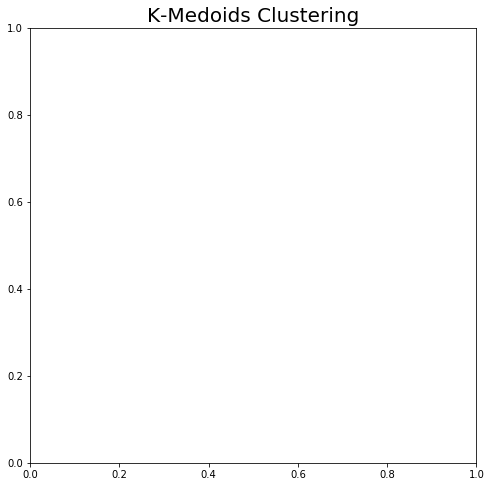

In [14]:
#visualize k-medoids clustering

#print('label {0}:　{1}'.format(label, data[point_idx]))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-Medoids Clustering', fontsize = 20)

ax.scatter(M[1])

In [15]:
#PCA component analysis 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [18]:
# PCA component analysis 
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Z = dataframe_app_c


#REMOVED ABOVE: App object, Price object, Genres, Last Updated, Current Ver, Android Ver

#2D PCA analysis with the following variables
#Category           object
#Rating            float64
#Reviews            object
#Size               object
#Installs           object
#Type               object
#Content Rating     object


Z = pd.DataFrame(X)
Z = Z.convert_objects(convert_numeric=True)
#Z.columns = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']

# Eliminating null values
for i in Z.columns:
    Z[i] = Z[i].fillna(int(Z[i].mean()))
for i in Z.columns:
    print(Z[i].isnull().sum())

0
0
0
0
0
0
0


/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms

In [19]:
#scaling/normalizing the data

#features = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']
# Separating out the features
#x = Z.loc[:, features].values
# Separating out the target
#y = Z.loc[:,['target']].values
# Standardizing the features
Z = StandardScaler().fit_transform(Z)

PCA Projection to 2D
The original data has 7 columns ('Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating'). In this section, the code projects the original data which is 7 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [20]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating'])

In [21]:
principalDf.describe()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04
mean,0.000000,1.310964e-17,-1.835350e-17,3.801797e-17,-3.998442e-17,-2.621929e-17,2.108593e-21
std,1.267624,1.053765e+00,9.806808e-01,9.350981e-01,9.101949e-01,7.865520e-01,2.262634e-19
min,-3.336684,-3.018785e+00,-2.401493e+00,-2.685624e+00,-3.473696e+00,-2.367984e+00,-4.495333e-19
25%,-0.897615,-7.504847e-01,-6.318528e-01,-4.750451e-01,-4.315107e-01,-4.891207e-01,-3.720729e-21
50%,-0.255989,-6.520650e-02,-8.969778e-02,3.349698e-02,4.917245e-02,4.662992e-02,1.174658e-22
75%,0.732502,8.047007e-01,4.399045e-01,5.091709e-01,4.449400e-01,5.012884e-01,3.914553e-21
max,13.224904,7.195812e+00,7.813613e+00,1.516421e+01,1.300080e+01,7.239724e+00,2.354580e-17


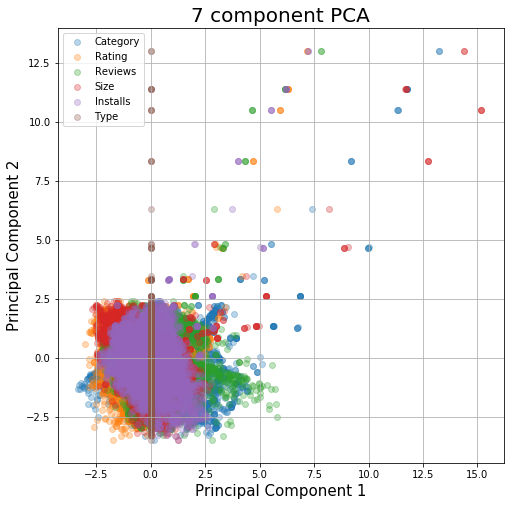

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('7 component PCA', fontsize = 20)
targets = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']
colors = ['r', 'g', 'b','c', 'y', 'p', 'm']
ax.scatter(principalDf['Category'], principalDf['Installs'], alpha = .3)
ax.scatter(principalDf['Rating'], principalDf['Installs'], alpha = .3)   
ax.scatter(principalDf['Reviews'], principalDf['Installs'], alpha = .3)
ax.scatter(principalDf['Size'], principalDf['Installs'], alpha = .3)
ax.scatter(principalDf['Type'], principalDf['Installs'], alpha = .3)
ax.scatter(principalDf['Content Rating'], principalDf['Installs'], alpha = .3)
ax.legend(targets)
ax.grid()


# Lets fit a model

In [224]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
df = pd.DataFrame(data_app_c)



In [226]:
#create an array of labels

df_labels = df[4]
df_labels.describe()
df_labels = df_labels.convert_objects(convert_numeric=True)
install_labels = np.array(df_labels)
print(len(install_labels))

10840


/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [227]:
#create an array of the other data

df_otherdata =  df.drop(df.columns[4], axis=1)
df_otherdata = df_otherdata.convert_objects(convert_numeric=True)

#Eliminating null values
for i in df_otherdata.columns:
    df_otherdata[i] = df_otherdata[i].fillna(int(X[i].mean()))
for i in df_otherdata.columns:
    print(df_otherdata[i].isnull().sum())


otherdata = np.array(df_otherdata)

print(len(otherdata))


0
0
0
0
0
0
0
0
0
0
0
0
10840


/Users/annachesson/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


# Logistic Regression


In [228]:
#convert types to be all float
otherdata = np.asarray(otherdata, dtype=np.float64 )
install_labels = np.asarray(install_labels, dtype=np.float64 )

#normalize the data- OR NOT bc it makes the score worse?????
#otherdata = StandardScaler().fit_transform(otherdata)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(otherdata, install_labels, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

In [203]:
# fit a model
#C = regularization parameter

logisticRegr = linear_model.LogisticRegression(C = .1, solver='lbfgs', multi_class='multinomial', max_iter=10000)
model = logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
print(predictions)

[5.e+06 5.e+04 1.e+07 ... 5.e+05 5.e+03 5.e+06]


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [204]:
print("approximation (mean accuracy) score: %.2f"
       % model.score(X_test, y_test))

approximation (mean accuracy) score: 0.74


In [120]:
import timeit

In [121]:
# create increasingly large random training sets
#initialize arrays
percent_sampled = []
approximation_error = []
cpu_time = []

i = .01
while i < 1.0:
    start = timeit.default_timer()
    X_train, X_test, y_train, y_test = train_test_split(otherdata, install_labels, test_size=i)
    lm = linear_model.LogisticRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    stop = timeit.default_timer()
    mse = model.score(X_test, y_test)
    time = stop-start
    percent_sampled = np.append(percent_sampled, i)
    approximation_error = np.append(approximation_error, mse)
    cpu_time = np.append(cpu_time, time)
    i += .01

/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

Text(0, 0.5, 'approximation error')

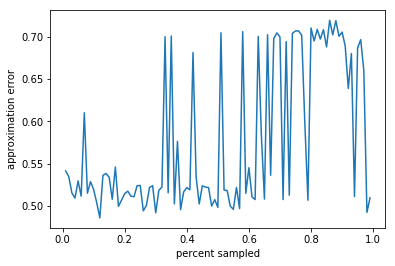

In [65]:
#plot approximation error (mean accuracy) as a function of number of samples
plt.plot(percent_sampled, approximation_error)
plt.xlabel("percent sampled")
plt.ylabel("approximation error")

Text(0, 0.5, 'cpu time')

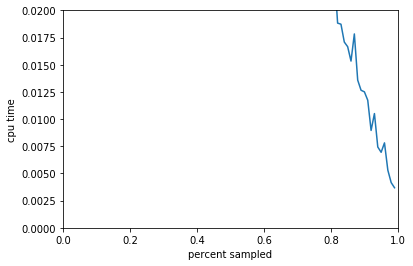

In [122]:
#plot CPU time as function of number of samples
plt.plot(percent_sampled, cpu_time)
plt.xlim([0, 1])
plt.ylim([0, .02])
plt.xlabel("percent sampled")
plt.ylabel("cpu time")

# Cross Validation!

In [205]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import Normalize
from sklearn.preprocessing import Normalizer

In [206]:
x, y = otherdata, install_labels

In [207]:
cross_validate = StratifiedShuffleSplit(n_splits=10, test_size=0.3)
print("cross_validate is ", cross_validate)

cross_validate is  StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None)


In [208]:
C_range = np.geomspace(.0001, 1, 50)
#gamma_range = np.geomspace(.00001, 10, 20)
param_grid = dict(C=C_range)

#param_grid=C_range

In [209]:
# GridSearchCV is a "grid-search" on C and γ using cross-validation.
# Various pairs of (C,γ) values are tried and the one with the best cross-validation accuracy are returned.
# one of the input paramaters is our C and gamma range, these ranges will be used.
# σ is for the RBF kernel and C for the SVM. 
# THIS SECTION OF CODE TAKES 10s or so to run. 
#build the SVM algorithm
grid = GridSearchCV(linear_model.LogisticRegression(), param_grid=param_grid, cv=cross_validate, verbose=10)
#train the results
grid.fit(x, y)
#print(grid)
print("The best parameters", (grid.best_params_, grid.best_score_))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.6743542435424354, total=   0.1s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be change

[CV] ............... C=0.0001, score=0.7183271832718328, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.6666666666666666, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.6888068880688807, total=   0.1s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed

[CV] ............... C=0.0001, score=0.6682041820418204, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.6814268142681427, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.6752767527675276, total=   0.1s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed

[CV] ............... C=0.0001, score=0.7137146371463715, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.7137146371463715, total=   0.1s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.6808118081180812, total=   0.1s
[CV] C=0.00012067926406393288 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed

[CV]  C=0.00012067926406393288, score=0.6740467404674046, total=   0.1s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.7186346863468634, total=   0.1s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.6666666666666666, total=   0.1s
[CV] C=0.00012067926406393288 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00012067926406393288, score=0.690959409594096, total=   0.1s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.6678966789667896, total=   0.1s
[CV] C=0.00012067926406393288 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00012067926406393288, score=0.681119311193112, total=   0.2s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.6746617466174661, total=   0.1s
[CV] C=0.00012067926406393288 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00012067926406393288, score=0.714329643296433, total=   0.1s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.7140221402214022, total=   0.1s
[CV] C=0.00012067926406393288 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00012067926406393288, score=0.6808118081180812, total=   0.1s
[CV] C=0.00014563484775012445 ........................................
[CV]  C=0.00014563484775012445, score=0.6734317343173432, total=   0.1s
[CV] C=0.00014563484775012445 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00014563484775012445, score=0.7192496924969249, total=   0.1s
[CV] C=0.00014563484775012445 ........................................
[CV]  C=0.00014563484775012445, score=0.6666666666666666, total=   0.2s
[CV] C=0.00014563484775012445 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00014563484775012445, score=0.690959409594096, total=   0.1s
[CV] C=0.00014563484775012445 ........................................
[CV]  C=0.00014563484775012445, score=0.6675891758917589, total=   0.1s
[CV] C=0.00014563484775012445 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00014563484775012445, score=0.6814268142681427, total=   0.2s
[CV] C=0.00014563484775012445 ........................................
[CV]  C=0.00014563484775012445, score=0.6746617466174661, total=   0.1s
[CV] C=0.00014563484775012445 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00014563484775012445, score=0.714329643296433, total=   0.1s
[CV] C=0.00014563484775012445 ........................................
[CV]  C=0.00014563484775012445, score=0.7137146371463715, total=   0.1s
[CV] C=0.00014563484775012445 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00014563484775012445, score=0.6808118081180812, total=   0.1s
[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.673739237392374, total=   0.1s
[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.7192496924969249, total=   0.1s
[CV] C=0.00017575106248547912 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00017575106248547912, score=0.6669741697416974, total=   0.1s
[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.690959409594096, total=   0.1s
[CV] C=0.00017575106248547912 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00017575106248547912, score=0.6682041820418204, total=   0.1s
[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.681119311193112, total=   0.1s
[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.6743542435424354, total=   0.1s


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.7140221402214022, total=   0.1s
[CV] C=0.00017575106248547912 ........................................
[CV]  C=0.00017575106248547912, score=0.7137146371463715, total=   0.1s
[CV] C=0.00017575106248547912 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00017575106248547912, score=0.6805043050430505, total=   0.1s
[CV] C=0.00021209508879201905 ........................................
[CV]  C=0.00021209508879201905, score=0.673739237392374, total=   0.1s
[CV] C=0.00021209508879201905 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00021209508879201905, score=0.7198646986469864, total=   0.1s
[CV] C=0.00021209508879201905 ........................................
[CV]  C=0.00021209508879201905, score=0.6669741697416974, total=   0.1s
[CV] C=0.00021209508879201905 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00021209508879201905, score=0.6906519065190652, total=   0.1s
[CV] C=0.00021209508879201905 ........................................
[CV]  C=0.00021209508879201905, score=0.6734317343173432, total=   0.1s
[CV] C=0.00021209508879201905 ........................................
[CV]  C=0.00021209508879201905, score=0.681119311193112, total=   0.1s
[CV] C=0.00021209508879201905 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00021209508879201905, score=0.6743542435424354, total=   0.1s
[CV] C=0.00021209508879201905 ........................................
[CV]  C=0.00021209508879201905, score=0.7140221402214022, total=   0.1s
[CV] C=0.00021209508879201905 ........................................
[CV]  C=0.00021209508879201905, score=0.7140221402214022, total=   0.1s
[CV] C=0.00021209508879201905 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00021209508879201905, score=0.6808118081180812, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV] . C=0.0002559547922699536, score=0.673739237392374, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV]  C=0.0002559547922699536, score=0.7201722017220172, total=   0.1s
[CV] C=0.0002559547922699536 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0002559547922699536, score=0.6669741697416974, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV]  C=0.0002559547922699536, score=0.6906519065190652, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV] . C=0.0002559547922699536, score=0.673739237392374, total=   0.1s
[CV] C=0.0002559547922699536 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.0002559547922699536, score=0.681119311193112, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV]  C=0.0002559547922699536, score=0.6749692496924969, total=   0.1s
[CV] C=0.0002559547922699536 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0002559547922699536, score=0.7137146371463715, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV]  C=0.0002559547922699536, score=0.7140221402214022, total=   0.1s
[CV] C=0.0002559547922699536 .........................................
[CV]  C=0.0002559547922699536, score=0.6808118081180812, total=   0.1s
[CV] C=0.00030888435964774815 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00030888435964774815, score=0.673739237392374, total=   0.1s
[CV] C=0.00030888435964774815 ........................................
[CV]  C=0.00030888435964774815, score=0.7201722017220172, total=   0.1s
[CV] C=0.00030888435964774815 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.00030888435964774815, score=0.6669741697416974, total=   0.1s
[CV] C=0.00030888435964774815 ........................................
[CV]  C=0.00030888435964774815, score=0.6903444034440345, total=   0.1s
[CV] C=0.00030888435964774815 ........................................
[CV]  C=0.00030888435964774815, score=0.6694341943419434, total=   0.1s
[CV] C=0.00030888435964774815 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00030888435964774815, score=0.6829643296432965, total=   0.1s
[CV] C=0.00030888435964774815 ........................................
[CV]  C=0.00030888435964774815, score=0.6749692496924969, total=   0.1s
[CV] C=0.00030888435964774815 ........................................
[CV]  C=0.00030888435964774815, score=0.7137146371463715, total=   0.1s
[CV] C=0.00030888435964774815 ........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.00030888435964774815, score=0.7134071340713407, total=   0.1s
[CV] C=0.00030888435964774815 ........................................
[CV]  C=0.00030888435964774815, score=0.6805043050430505, total=   0.1s
[CV] C=0.0003727593720314938 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0003727593720314938, score=0.6740467404674046, total=   0.1s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.7204797047970479, total=   0.1s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.6669741697416974, total=   0.1s
[CV] C=0.0003727593720314938 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0003727593720314938, score=0.6903444034440345, total=   0.1s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.6685116851168512, total=   0.1s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.6829643296432965, total=   0.1s
[CV] C=0.0003727593720314938 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0003727593720314938, score=0.6749692496924969, total=   0.1s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.7140221402214022, total=   0.1s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.7137146371463715, total=   0.1s
[CV] C=0.0003727593720314938 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.0003727593720314938, score=0.681119311193112, total=   0.1s
[CV] C=0.0004498432668969444 .........................................
[CV]  C=0.0004498432668969444, score=0.6740467404674046, total=   0.1s
[CV] C=0.0004498432668969444 .........................................
[CV]  C=0.0004498432668969444, score=0.7201722017220172, total=   0.1s
[CV] C=0.0004498432668969444 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0004498432668969444, score=0.6669741697416974, total=   0.1s
[CV] C=0.0004498432668969444 .........................................
[CV] . C=0.0004498432668969444, score=0.690959409594096, total=   0.1s
[CV] C=0.0004498432668969444 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0004498432668969444, score=0.6743542435424354, total=   0.1s
[CV] C=0.0004498432668969444 .........................................
[CV]  C=0.0004498432668969444, score=0.6829643296432965, total=   0.1s
[CV] C=0.0004498432668969444 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0004498432668969444, score=0.6749692496924969, total=   0.1s
[CV] C=0.0004498432668969444 .........................................
[CV]  C=0.0004498432668969444, score=0.7146371463714637, total=   0.1s
[CV] C=0.0004498432668969444 .........................................
[CV]  C=0.0004498432668969444, score=0.7137146371463715, total=   0.1s
[CV] C=0.0004498432668969444 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.0004498432668969444, score=0.681119311193112, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV]  C=0.0005428675439323859, score=0.6746617466174661, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV]  C=0.0005428675439323859, score=0.7201722017220172, total=   0.1s
[CV] C=0.0005428675439323859 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0005428675439323859, score=0.6669741697416974, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV] . C=0.0005428675439323859, score=0.690959409594096, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV]  C=0.0005428675439323859, score=0.6740467404674046, total=   0.1s
[CV] C=0.0005428675439323859 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0005428675439323859, score=0.6832718327183271, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV]  C=0.0005428675439323859, score=0.6783517835178352, total=   0.1s
[CV] C=0.0005428675439323859 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0005428675439323859, score=0.7146371463714637, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV]  C=0.0005428675439323859, score=0.7137146371463715, total=   0.1s
[CV] C=0.0005428675439323859 .........................................
[CV]  C=0.0005428675439323859, score=0.6808118081180812, total=   0.1s
[CV] C=0.0006551285568595509 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0006551285568595509, score=0.6746617466174661, total=   0.1s
[CV] C=0.0006551285568595509 .........................................
[CV]  C=0.0006551285568595509, score=0.7201722017220172, total=   0.2s
[CV] C=0.0006551285568595509 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0006551285568595509, score=0.6626691266912669, total=   0.1s
[CV] C=0.0006551285568595509 .........................................
[CV] . C=0.0006551285568595509, score=0.690959409594096, total=   0.1s
[CV] C=0.0006551285568595509 .........................................
[CV]  C=0.0006551285568595509, score=0.6740467404674046, total=   0.1s
[CV] C=0.0006551285568595509 .........................................
[CV]  C=0.0006551285568595509, score=0.6838868388683886, total=   0.1s
[CV] C=0.0006551285568595509 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0006551285568595509, score=0.6783517835178352, total=   0.1s
[CV] C=0.0006551285568595509 .........................................
[CV] . C=0.0006551285568595509, score=0.714329643296433, total=   0.1s
[CV] C=0.0006551285568595509 .........................................
[CV]  C=0.0006551285568595509, score=0.7134071340713407, total=   0.1s
[CV] C=0.0006551285568595509 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0006551285568595509, score=0.6808118081180812, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV]  C=0.0007906043210907702, score=0.6749692496924969, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV]  C=0.0007906043210907702, score=0.7201722017220172, total=   0.1s
[CV] C=0.0007906043210907702 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0007906043210907702, score=0.6626691266912669, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV] . C=0.0007906043210907702, score=0.690959409594096, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV]  C=0.0007906043210907702, score=0.6694341943419434, total=   0.1s
[CV] C=0.0007906043210907702 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0007906043210907702, score=0.6838868388683886, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV]  C=0.0007906043210907702, score=0.6783517835178352, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV]  C=0.0007906043210907702, score=0.7140221402214022, total=   0.1s
[CV] C=0.0007906043210907702 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0007906043210907702, score=0.7134071340713407, total=   0.1s
[CV] C=0.0007906043210907702 .........................................
[CV]  C=0.0007906043210907702, score=0.6814268142681427, total=   0.1s
[CV] C=0.0009540954763499944 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0009540954763499944, score=0.6749692496924969, total=   0.1s
[CV] C=0.0009540954763499944 .........................................
[CV]  C=0.0009540954763499944, score=0.7198646986469864, total=   0.1s
[CV] C=0.0009540954763499944 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0009540954763499944, score=0.6626691266912669, total=   0.1s
[CV] C=0.0009540954763499944 .........................................
[CV] . C=0.0009540954763499944, score=0.690959409594096, total=   0.1s
[CV] C=0.0009540954763499944 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0009540954763499944, score=0.6694341943419434, total=   0.1s
[CV] C=0.0009540954763499944 .........................................
[CV]  C=0.0009540954763499944, score=0.6838868388683886, total=   0.1s
[CV] C=0.0009540954763499944 .........................................
[CV]  C=0.0009540954763499944, score=0.6786592865928659, total=   0.1s
[CV] C=0.0009540954763499944 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.0009540954763499944, score=0.714329643296433, total=   0.1s
[CV] C=0.0009540954763499944 .........................................
[CV]  C=0.0009540954763499944, score=0.7134071340713407, total=   0.1s
[CV] C=0.0009540954763499944 .........................................
[CV]  C=0.0009540954763499944, score=0.6814268142681427, total=   0.1s
[CV] C=0.0011513953993264468 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0011513953993264468, score=0.6749692496924969, total=   0.1s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.7198646986469864, total=   0.1s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.6629766297662977, total=   0.1s
[CV] C=0.0011513953993264468 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0011513953993264468, score=0.6912669126691267, total=   0.1s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.6694341943419434, total=   0.1s
[CV] C=0.0011513953993264468 .........................................
[CV] . C=0.0011513953993264468, score=0.683579335793358, total=   0.1s
[CV] C=0.0011513953993264468 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0011513953993264468, score=0.6786592865928659, total=   0.1s
[CV] C=0.0011513953993264468 .........................................
[CV] . C=0.0011513953993264468, score=0.714329643296433, total=   0.1s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.7134071340713407, total=   0.1s
[CV] C=0.0011513953993264468 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0011513953993264468, score=0.6814268142681427, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV]  C=0.0013894954943731374, score=0.6752767527675276, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV]  C=0.0013894954943731374, score=0.7198646986469864, total=   0.1s
[CV] C=0.0013894954943731374 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0013894954943731374, score=0.6629766297662977, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV]  C=0.0013894954943731374, score=0.6912669126691267, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV]  C=0.0013894954943731374, score=0.6694341943419434, total=   0.1s
[CV] C=0.0013894954943731374 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.0013894954943731374, score=0.683579335793358, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV]  C=0.0013894954943731374, score=0.6786592865928659, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV] . C=0.0013894954943731374, score=0.714329643296433, total=   0.1s
[CV] C=0.0013894954943731374 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0013894954943731374, score=0.7137146371463715, total=   0.1s
[CV] C=0.0013894954943731374 .........................................
[CV]  C=0.0013894954943731374, score=0.6817343173431735, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV]  C=0.0016768329368110067, score=0.6755842558425584, total=   0.1s
[CV] C=0.0016768329368110067 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0016768329368110067, score=0.7201722017220172, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV]  C=0.0016768329368110067, score=0.6629766297662977, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV]  C=0.0016768329368110067, score=0.6912669126691267, total=   0.1s
[CV] C=0.0016768329368110067 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0016768329368110067, score=0.6694341943419434, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV] . C=0.0016768329368110067, score=0.683579335793358, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV]  C=0.0016768329368110067, score=0.6786592865928659, total=   0.1s
[CV] C=0.0016768329368110067 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0016768329368110067, score=0.7140221402214022, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV]  C=0.0016768329368110067, score=0.7137146371463715, total=   0.1s
[CV] C=0.0016768329368110067 .........................................
[CV]  C=0.0016768329368110067, score=0.6817343173431735, total=   0.1s
[CV] C=0.0020235896477251557 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0020235896477251557, score=0.6758917589175891, total=   0.1s
[CV] C=0.0020235896477251557 .........................................
[CV]  C=0.0020235896477251557, score=0.7201722017220172, total=   0.1s
[CV] C=0.0020235896477251557 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0020235896477251557, score=0.6629766297662977, total=   0.1s
[CV] C=0.0020235896477251557 .........................................
[CV]  C=0.0020235896477251557, score=0.6912669126691267, total=   0.1s
[CV] C=0.0020235896477251557 .........................................
[CV]  C=0.0020235896477251557, score=0.6694341943419434, total=   0.1s
[CV] C=0.0020235896477251557 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0020235896477251557, score=0.6829643296432965, total=   0.1s
[CV] C=0.0020235896477251557 .........................................
[CV]  C=0.0020235896477251557, score=0.6786592865928659, total=   0.1s
[CV] C=0.0020235896477251557 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0020235896477251557, score=0.7140221402214022, total=   0.1s
[CV] C=0.0020235896477251557 .........................................
[CV]  C=0.0020235896477251557, score=0.7137146371463715, total=   0.1s
[CV] C=0.0020235896477251557 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0020235896477251557, score=0.6817343173431735, total=   0.2s
[CV] C=0.0024420530945486497 .........................................
[CV]  C=0.0024420530945486497, score=0.6783517835178352, total=   0.1s
[CV] C=0.0024420530945486497 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0024420530945486497, score=0.7201722017220172, total=   0.1s
[CV] C=0.0024420530945486497 .........................................
[CV]  C=0.0024420530945486497, score=0.6629766297662977, total=   0.1s
[CV] C=0.0024420530945486497 .........................................
[CV]  C=0.0024420530945486497, score=0.6912669126691267, total=   0.1s
[CV] C=0.0024420530945486497 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0024420530945486497, score=0.6694341943419434, total=   0.1s
[CV] C=0.0024420530945486497 .........................................
[CV]  C=0.0024420530945486497, score=0.6829643296432965, total=   0.1s
[CV] C=0.0024420530945486497 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0024420530945486497, score=0.6786592865928659, total=   0.1s
[CV] C=0.0024420530945486497 .........................................
[CV]  C=0.0024420530945486497, score=0.7140221402214022, total=   0.1s
[CV] C=0.0024420530945486497 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0024420530945486497, score=0.7137146371463715, total=   0.1s
[CV] C=0.0024420530945486497 .........................................
[CV]  C=0.0024420530945486497, score=0.6817343173431735, total=   0.2s
[CV] C=0.0029470517025518097 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0029470517025518097, score=0.6783517835178352, total=   0.1s
[CV] C=0.0029470517025518097 .........................................
[CV]  C=0.0029470517025518097, score=0.7198646986469864, total=   0.1s
[CV] C=0.0029470517025518097 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0029470517025518097, score=0.6629766297662977, total=   0.2s
[CV] C=0.0029470517025518097 .........................................
[CV]  C=0.0029470517025518097, score=0.6912669126691267, total=   0.1s
[CV] C=0.0029470517025518097 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0029470517025518097, score=0.6694341943419434, total=   0.1s
[CV] C=0.0029470517025518097 .........................................
[CV]  C=0.0029470517025518097, score=0.6829643296432965, total=   0.1s
[CV] C=0.0029470517025518097 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0029470517025518097, score=0.6786592865928659, total=   0.2s
[CV] C=0.0029470517025518097 .........................................
[CV]  C=0.0029470517025518097, score=0.7140221402214022, total=   0.1s
[CV] C=0.0029470517025518097 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0029470517025518097, score=0.7137146371463715, total=   0.1s
[CV] C=0.0029470517025518097 .........................................
[CV]  C=0.0029470517025518097, score=0.6817343173431735, total=   0.1s
[CV] C=0.0035564803062231283 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0035564803062231283, score=0.6783517835178352, total=   0.1s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.7198646986469864, total=   0.1s
[CV] C=0.0035564803062231283 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0035564803062231283, score=0.6629766297662977, total=   0.1s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.6912669126691267, total=   0.1s
[CV] C=0.0035564803062231283 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0035564803062231283, score=0.6694341943419434, total=   0.1s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.6829643296432965, total=   0.1s
[CV] C=0.0035564803062231283 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0035564803062231283, score=0.6786592865928659, total=   0.1s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.7140221402214022, total=   0.1s
[CV] C=0.0035564803062231283 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0035564803062231283, score=0.7137146371463715, total=   0.1s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.6817343173431735, total=   0.1s
[CV] C=0.004291934260128779 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.004291934260128779, score=0.6783517835178352, total=   0.1s
[CV] C=0.004291934260128779 ..........................................
[CV] . C=0.004291934260128779, score=0.7198646986469864, total=   0.1s
[CV] C=0.004291934260128779 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.004291934260128779, score=0.6626691266912669, total=   0.1s
[CV] C=0.004291934260128779 ..........................................
[CV] . C=0.004291934260128779, score=0.6912669126691267, total=   0.1s
[CV] C=0.004291934260128779 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.004291934260128779, score=0.6694341943419434, total=   0.1s
[CV] C=0.004291934260128779 ..........................................
[CV] . C=0.004291934260128779, score=0.6829643296432965, total=   0.1s
[CV] C=0.004291934260128779 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.004291934260128779, score=0.6786592865928659, total=   0.1s
[CV] C=0.004291934260128779 ..........................................
[CV] . C=0.004291934260128779, score=0.7140221402214022, total=   0.1s
[CV] C=0.004291934260128779 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.004291934260128779, score=0.7137146371463715, total=   0.1s
[CV] C=0.004291934260128779 ..........................................
[CV] . C=0.004291934260128779, score=0.6817343173431735, total=   0.1s
[CV] C=0.005179474679231213 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.005179474679231213, score=0.6783517835178352, total=   0.1s
[CV] C=0.005179474679231213 ..........................................
[CV] . C=0.005179474679231213, score=0.7198646986469864, total=   0.1s
[CV] C=0.005179474679231213 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.005179474679231213, score=0.6626691266912669, total=   0.1s
[CV] C=0.005179474679231213 ..........................................
[CV] . C=0.005179474679231213, score=0.6912669126691267, total=   0.1s
[CV] C=0.005179474679231213 ..........................................
[CV] . C=0.005179474679231213, score=0.6694341943419434, total=   0.1s
[CV] C=0.005179474679231213 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.005179474679231213, score=0.6829643296432965, total=   0.1s
[CV] C=0.005179474679231213 ..........................................
[CV] . C=0.005179474679231213, score=0.6786592865928659, total=   0.1s
[CV] C=0.005179474679231213 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.005179474679231213, score=0.7140221402214022, total=   0.1s
[CV] C=0.005179474679231213 ..........................................
[CV] . C=0.005179474679231213, score=0.7137146371463715, total=   0.1s
[CV] C=0.005179474679231213 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.005179474679231213, score=0.6817343173431735, total=   0.1s
[CV] C=0.0062505519252739694 .........................................
[CV]  C=0.0062505519252739694, score=0.6783517835178352, total=   0.1s
[CV] C=0.0062505519252739694 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0062505519252739694, score=0.7198646986469864, total=   0.1s
[CV] C=0.0062505519252739694 .........................................
[CV]  C=0.0062505519252739694, score=0.6626691266912669, total=   0.1s
[CV] C=0.0062505519252739694 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  C=0.0062505519252739694, score=0.6912669126691267, total=   0.1s
[CV] C=0.0062505519252739694 .........................................
[CV]  C=0.0062505519252739694, score=0.6694341943419434, total=   0.1s
[CV] C=0.0062505519252739694 .........................................
[CV]  C=0.0062505519252739694, score=0.6829643296432965, total=   0.1s
[CV] C=0.0062505519252739694 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0062505519252739694, score=0.6786592865928659, total=   0.1s
[CV] C=0.0062505519252739694 .........................................
[CV]  C=0.0062505519252739694, score=0.7140221402214022, total=   0.1s
[CV] C=0.0062505519252739694 .........................................
[CV]  C=0.0062505519252739694, score=0.7137146371463715, total=   0.1s
[CV] C=0.0062505519252739694 .........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV]  C=0.0062505519252739694, score=0.6817343173431735, total=   0.1s
[CV] C=0.007543120063354615 ..........................................
[CV] . C=0.007543120063354615, score=0.6783517835178352, total=   0.1s
[CV] C=0.007543120063354615 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.007543120063354615, score=0.7198646986469864, total=   0.1s
[CV] C=0.007543120063354615 ..........................................
[CV] . C=0.007543120063354615, score=0.6626691266912669, total=   0.1s
[CV] C=0.007543120063354615 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.007543120063354615, score=0.6912669126691267, total=   0.1s
[CV] C=0.007543120063354615 ..........................................
[CV] . C=0.007543120063354615, score=0.6694341943419434, total=   0.1s
[CV] C=0.007543120063354615 ..........................................
[CV] . C=0.007543120063354615, score=0.6829643296432965, total=   0.1s
[CV] C=0.007543120063354615 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.007543120063354615, score=0.6786592865928659, total=   0.1s
[CV] C=0.007543120063354615 ..........................................
[CV] . C=0.007543120063354615, score=0.7140221402214022, total=   0.1s
[CV] C=0.007543120063354615 ..........................................
[CV] . C=0.007543120063354615, score=0.7137146371463715, total=   0.1s
[CV] C=0.007543120063354615 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.007543120063354615, score=0.6817343173431735, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.6783517835178352, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.7198646986469864, total=   0.1s
[CV] C=0.009102981779915217 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.009102981779915217, score=0.6626691266912669, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.6912669126691267, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.6694341943419434, total=   0.1s
[CV] C=0.009102981779915217 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.009102981779915217, score=0.6829643296432965, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.6786592865928659, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.7140221402214022, total=   0.1s
[CV] C=0.009102981779915217 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.009102981779915217, score=0.7137146371463715, total=   0.1s
[CV] C=0.009102981779915217 ..........................................
[CV] . C=0.009102981779915217, score=0.6817343173431735, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.6783517835178352, total=   0.1s
[CV] C=0.010985411419875584 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.010985411419875584, score=0.7198646986469864, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.6626691266912669, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.6912669126691267, total=   0.1s
[CV] C=0.010985411419875584 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.010985411419875584, score=0.6694341943419434, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.6829643296432965, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.6786592865928659, total=   0.1s
[CV] C=0.010985411419875584 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.010985411419875584, score=0.7140221402214022, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.7137146371463715, total=   0.1s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.6817343173431735, total=   0.1s
[CV] C=0.013257113655901081 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.013257113655901081, score=0.6783517835178352, total=   0.1s
[CV] C=0.013257113655901081 ..........................................
[CV] . C=0.013257113655901081, score=0.7198646986469864, total=   0.1s
[CV] C=0.013257113655901081 ..........................................
[CV] . C=0.013257113655901081, score=0.6626691266912669, total=   0.1s
[CV] C=0.013257113655901081 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.013257113655901081, score=0.6912669126691267, total=   0.1s
[CV] C=0.013257113655901081 ..........................................
[CV] . C=0.013257113655901081, score=0.6694341943419434, total=   0.1s
[CV] C=0.013257113655901081 ..........................................
[CV] . C=0.013257113655901081, score=0.6829643296432965, total=   0.1s
[CV] C=0.013257113655901081 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.013257113655901081, score=0.6786592865928659, total=   0.1s
[CV] C=0.013257113655901081 ..........................................
[CV] . C=0.013257113655901081, score=0.7140221402214022, total=   0.1s
[CV] C=0.013257113655901081 ..........................................
[CV] . C=0.013257113655901081, score=0.7137146371463715, total=   0.1s
[CV] C=0.013257113655901081 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.013257113655901081, score=0.6817343173431735, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.6783517835178352, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.7198646986469864, total=   0.1s
[CV] C=0.015998587196060572 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.015998587196060572, score=0.6626691266912669, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.6912669126691267, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.6694341943419434, total=   0.1s
[CV] C=0.015998587196060572 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.015998587196060572, score=0.6829643296432965, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.6786592865928659, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.7140221402214022, total=   0.1s
[CV] C=0.015998587196060572 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.015998587196060572, score=0.7137146371463715, total=   0.1s
[CV] C=0.015998587196060572 ..........................................
[CV] . C=0.015998587196060572, score=0.6817343173431735, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.6783517835178352, total=   0.1s
[CV] C=0.019306977288832496 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.019306977288832496, score=0.7198646986469864, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.6626691266912669, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.6912669126691267, total=   0.1s
[CV] C=0.019306977288832496 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.019306977288832496, score=0.6694341943419434, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.6829643296432965, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.6786592865928659, total=   0.1s
[CV] C=0.019306977288832496 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.019306977288832496, score=0.714329643296433, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.7137146371463715, total=   0.1s
[CV] C=0.019306977288832496 ..........................................
[CV] . C=0.019306977288832496, score=0.6817343173431735, total=   0.1s
[CV] C=0.023299518105153717 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.023299518105153717, score=0.6783517835178352, total=   0.1s
[CV] C=0.023299518105153717 ..........................................
[CV] . C=0.023299518105153717, score=0.7198646986469864, total=   0.1s
[CV] C=0.023299518105153717 ..........................................
[CV] . C=0.023299518105153717, score=0.6626691266912669, total=   0.1s
[CV] C=0.023299518105153717 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.023299518105153717, score=0.6912669126691267, total=   0.1s
[CV] C=0.023299518105153717 ..........................................
[CV] . C=0.023299518105153717, score=0.6694341943419434, total=   0.1s
[CV] C=0.023299518105153717 ..........................................
[CV] . C=0.023299518105153717, score=0.6829643296432965, total=   0.1s
[CV] C=0.023299518105153717 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.023299518105153717, score=0.6786592865928659, total=   0.1s
[CV] C=0.023299518105153717 ..........................................
[CV] .. C=0.023299518105153717, score=0.714329643296433, total=   0.1s
[CV] C=0.023299518105153717 ..........................................
[CV] . C=0.023299518105153717, score=0.7137146371463715, total=   0.1s
[CV] C=0.023299518105153717 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.023299518105153717, score=0.6817343173431735, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] .. C=0.02811768697974228, score=0.6783517835178352, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] .. C=0.02811768697974228, score=0.7198646986469864, total=   0.1s
[CV] C=0.02811768697974228 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.02811768697974228, score=0.6626691266912669, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] .. C=0.02811768697974228, score=0.6912669126691267, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] .. C=0.02811768697974228, score=0.6694341943419434, total=   0.1s
[CV] C=0.02811768697974228 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.02811768697974228, score=0.6829643296432965, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] .. C=0.02811768697974228, score=0.6786592865928659, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] ... C=0.02811768697974228, score=0.714329643296433, total=   0.1s
[CV] C=0.02811768697974228 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.02811768697974228, score=0.7137146371463715, total=   0.1s
[CV] C=0.02811768697974228 ...........................................
[CV] .. C=0.02811768697974228, score=0.6814268142681427, total=   0.1s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.6783517835178352, total=   0.1s
[CV] C=0.033932217718953266 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.033932217718953266, score=0.7198646986469864, total=   0.1s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.6626691266912669, total=   0.1s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.6912669126691267, total=   0.1s
[CV] C=0.033932217718953266 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.033932217718953266, score=0.6694341943419434, total=   0.1s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.6829643296432965, total=   0.1s
[CV] C=0.033932217718953266 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.033932217718953266, score=0.6786592865928659, total=   0.1s
[CV] C=0.033932217718953266 ..........................................
[CV] .. C=0.033932217718953266, score=0.714329643296433, total=   0.1s
[CV] C=0.033932217718953266 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.033932217718953266, score=0.7137146371463715, total=   0.1s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.6814268142681427, total=   0.1s
[CV] C=0.040949150623804234 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.040949150623804234, score=0.6783517835178352, total=   0.1s
[CV] C=0.040949150623804234 ..........................................
[CV] . C=0.040949150623804234, score=0.7198646986469864, total=   0.1s
[CV] C=0.040949150623804234 ..........................................
[CV] . C=0.040949150623804234, score=0.6626691266912669, total=   0.1s
[CV] C=0.040949150623804234 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] . C=0.040949150623804234, score=0.6912669126691267, total=   0.1s
[CV] C=0.040949150623804234 ..........................................
[CV] . C=0.040949150623804234, score=0.6694341943419434, total=   0.1s
[CV] C=0.040949150623804234 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] . C=0.040949150623804234, score=0.6829643296432965, total=   0.1s
[CV] C=0.040949150623804234 ..........................................
[CV] . C=0.040949150623804234, score=0.6786592865928659, total=   0.1s
[CV] C=0.040949150623804234 ..........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.040949150623804234, score=0.714329643296433, total=   0.1s
[CV] C=0.040949150623804234 ..........................................
[CV] . C=0.040949150623804234, score=0.7137146371463715, total=   0.1s
[CV] C=0.040949150623804234 ..........................................
[CV] . C=0.040949150623804234, score=0.6814268142681427, total=   0.1s
[CV] C=0.04941713361323833 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.04941713361323833, score=0.6783517835178352, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] .. C=0.04941713361323833, score=0.7198646986469864, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] .. C=0.04941713361323833, score=0.6626691266912669, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] .. C=0.04941713361323833, score=0.6912669126691267, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] .. C=0.04941713361323833, score=0.6694341943419434, total=   0.1s
[CV] C=0.04941713361323833 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.04941713361323833, score=0.6829643296432965, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] .. C=0.04941713361323833, score=0.6786592865928659, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] ... C=0.04941713361323833, score=0.714329643296433, total=   0.1s
[CV] C=0.04941713361323833 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.04941713361323833, score=0.7137146371463715, total=   0.1s
[CV] C=0.04941713361323833 ...........................................
[CV] .. C=0.04941713361323833, score=0.6814268142681427, total=   0.1s
[CV] C=0.05963623316594643 ...........................................
[CV] .. C=0.05963623316594643, score=0.6783517835178352, total=   0.1s
[CV] C=0.05963623316594643 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.05963623316594643, score=0.7198646986469864, total=   0.1s
[CV] C=0.05963623316594643 ...........................................
[CV] .. C=0.05963623316594643, score=0.6623616236162362, total=   0.1s
[CV] C=0.05963623316594643 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.05963623316594643, score=0.6912669126691267, total=   0.1s
[CV] C=0.05963623316594643 ...........................................
[CV] .. C=0.05963623316594643, score=0.6694341943419434, total=   0.1s
[CV] C=0.05963623316594643 ...........................................
[CV] .. C=0.05963623316594643, score=0.6829643296432965, total=   0.1s
[CV] C=0.05963623316594643 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.05963623316594643, score=0.6786592865928659, total=   0.1s
[CV] C=0.05963623316594643 ...........................................
[CV] ... C=0.05963623316594643, score=0.714329643296433, total=   0.1s
[CV] C=0.05963623316594643 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.05963623316594643, score=0.7137146371463715, total=   0.1s
[CV] C=0.05963623316594643 ...........................................
[CV] ... C=0.05963623316594643, score=0.681119311193112, total=   0.1s
[CV] C=0.07196856730011514 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.07196856730011514, score=0.6783517835178352, total=   0.2s
[CV] C=0.07196856730011514 ...........................................
[CV] .. C=0.07196856730011514, score=0.7198646986469864, total=   0.1s
[CV] C=0.07196856730011514 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.07196856730011514, score=0.6623616236162362, total=   0.1s
[CV] C=0.07196856730011514 ...........................................
[CV] .. C=0.07196856730011514, score=0.6912669126691267, total=   0.1s
[CV] C=0.07196856730011514 ...........................................
[CV] .. C=0.07196856730011514, score=0.6694341943419434, total=   0.1s
[CV] C=0.07196856730011514 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.07196856730011514, score=0.6829643296432965, total=   0.1s
[CV] C=0.07196856730011514 ...........................................
[CV] .. C=0.07196856730011514, score=0.6786592865928659, total=   0.1s
[CV] C=0.07196856730011514 ...........................................
[CV] ... C=0.07196856730011514, score=0.714329643296433, total=   0.1s
[CV] C=0.07196856730011514 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.07196856730011514, score=0.7137146371463715, total=   0.1s
[CV] C=0.07196856730011514 ...........................................
[CV] ... C=0.07196856730011514, score=0.681119311193112, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.6783517835178352, total=   0.1s
[CV] C=0.08685113737513521 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.08685113737513521, score=0.7198646986469864, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.6623616236162362, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.6912669126691267, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.6694341943419434, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.6829643296432965, total=   0.1s
[CV] C=0.08685113737513521 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.08685113737513521, score=0.6786592865928659, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] ... C=0.08685113737513521, score=0.714329643296433, total=   0.1s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.7137146371463715, total=   0.1s
[CV] C=0.08685113737513521 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.08685113737513521, score=0.681119311193112, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.6783517835178352, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.7198646986469864, total=   0.1s
[CV] C=0.10481131341546852 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.10481131341546852, score=0.6623616236162362, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.6912669126691267, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.6694341943419434, total=   0.1s
[CV] C=0.10481131341546852 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.10481131341546852, score=0.6829643296432965, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.6786592865928659, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] ... C=0.10481131341546852, score=0.714329643296433, total=   0.1s
[CV] C=0.10481131341546852 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.10481131341546852, score=0.7137146371463715, total=   0.1s
[CV] C=0.10481131341546852 ...........................................
[CV] ... C=0.10481131341546852, score=0.681119311193112, total=   0.1s
[CV] C=0.12648552168552957 ...........................................
[CV] .. C=0.12648552168552957, score=0.6783517835178352, total=   0.1s
[CV] C=0.12648552168552957 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.12648552168552957, score=0.7198646986469864, total=   0.1s
[CV] C=0.12648552168552957 ...........................................
[CV] .. C=0.12648552168552957, score=0.6623616236162362, total=   0.1s
[CV] C=0.12648552168552957 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.12648552168552957, score=0.6912669126691267, total=   0.1s
[CV] C=0.12648552168552957 ...........................................
[CV] .. C=0.12648552168552957, score=0.6694341943419434, total=   0.1s
[CV] C=0.12648552168552957 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.12648552168552957, score=0.6829643296432965, total=   0.1s
[CV] C=0.12648552168552957 ...........................................
[CV] .. C=0.12648552168552957, score=0.6786592865928659, total=   0.1s
[CV] C=0.12648552168552957 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.12648552168552957, score=0.714329643296433, total=   0.1s
[CV] C=0.12648552168552957 ...........................................
[CV] .. C=0.12648552168552957, score=0.7137146371463715, total=   0.1s
[CV] C=0.12648552168552957 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.12648552168552957, score=0.681119311193112, total=   0.1s
[CV] C=0.15264179671752318 ...........................................
[CV] .. C=0.15264179671752318, score=0.6783517835178352, total=   0.1s
[CV] C=0.15264179671752318 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.15264179671752318, score=0.7198646986469864, total=   0.1s
[CV] C=0.15264179671752318 ...........................................
[CV] .. C=0.15264179671752318, score=0.6623616236162362, total=   0.1s
[CV] C=0.15264179671752318 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.15264179671752318, score=0.6912669126691267, total=   0.1s
[CV] C=0.15264179671752318 ...........................................
[CV] .. C=0.15264179671752318, score=0.6694341943419434, total=   0.1s
[CV] C=0.15264179671752318 ...........................................
[CV] .. C=0.15264179671752318, score=0.6829643296432965, total=   0.1s
[CV] C=0.15264179671752318 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.15264179671752318, score=0.6786592865928659, total=   0.1s
[CV] C=0.15264179671752318 ...........................................
[CV] ... C=0.15264179671752318, score=0.714329643296433, total=   0.1s
[CV] C=0.15264179671752318 ...........................................
[CV] .. C=0.15264179671752318, score=0.7137146371463715, total=   0.1s
[CV] C=0.15264179671752318 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.15264179671752318, score=0.681119311193112, total=   0.1s
[CV] C=0.18420699693267145 ...........................................
[CV] .. C=0.18420699693267145, score=0.6783517835178352, total=   0.1s
[CV] C=0.18420699693267145 ...........................................
[CV] .. C=0.18420699693267145, score=0.7198646986469864, total=   0.1s
[CV] C=0.18420699693267145 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.18420699693267145, score=0.6623616236162362, total=   0.1s
[CV] C=0.18420699693267145 ...........................................
[CV] .. C=0.18420699693267145, score=0.6912669126691267, total=   0.1s
[CV] C=0.18420699693267145 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.18420699693267145, score=0.6694341943419434, total=   0.1s
[CV] C=0.18420699693267145 ...........................................
[CV] .. C=0.18420699693267145, score=0.6829643296432965, total=   0.1s
[CV] C=0.18420699693267145 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.18420699693267145, score=0.6786592865928659, total=   0.1s
[CV] C=0.18420699693267145 ...........................................
[CV] ... C=0.18420699693267145, score=0.714329643296433, total=   0.1s
[CV] C=0.18420699693267145 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.18420699693267145, score=0.7137146371463715, total=   0.1s
[CV] C=0.18420699693267145 ...........................................
[CV] ... C=0.18420699693267145, score=0.681119311193112, total=   0.1s
[CV] C=0.22229964825261933 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.22229964825261933, score=0.6783517835178352, total=   0.1s
[CV] C=0.22229964825261933 ...........................................
[CV] .. C=0.22229964825261933, score=0.7198646986469864, total=   0.1s
[CV] C=0.22229964825261933 ...........................................
[CV] .. C=0.22229964825261933, score=0.6623616236162362, total=   0.1s
[CV] C=0.22229964825261933 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.22229964825261933, score=0.6912669126691267, total=   0.1s
[CV] C=0.22229964825261933 ...........................................
[CV] .. C=0.22229964825261933, score=0.6694341943419434, total=   0.1s
[CV] C=0.22229964825261933 ...........................................
[CV] .. C=0.22229964825261933, score=0.6829643296432965, total=   0.1s
[CV] C=0.22229964825261933 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.22229964825261933, score=0.6786592865928659, total=   0.1s
[CV] C=0.22229964825261933 ...........................................
[CV] ... C=0.22229964825261933, score=0.714329643296433, total=   0.1s
[CV] C=0.22229964825261933 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.22229964825261933, score=0.7137146371463715, total=   0.1s
[CV] C=0.22229964825261933 ...........................................
[CV] ... C=0.22229964825261933, score=0.681119311193112, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.6783517835178352, total=   0.1s
[CV] C=0.2682695795279725 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.2682695795279725, score=0.7198646986469864, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.6623616236162362, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.6912669126691267, total=   0.1s
[CV] C=0.2682695795279725 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.2682695795279725, score=0.6694341943419434, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.6829643296432965, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.6786592865928659, total=   0.1s
[CV] C=0.2682695795279725 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .... C=0.2682695795279725, score=0.714329643296433, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.7137146371463715, total=   0.1s
[CV] C=0.2682695795279725 ............................................
[CV] .... C=0.2682695795279725, score=0.681119311193112, total=   0.1s
[CV] C=0.32374575428176433 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.32374575428176433, score=0.6783517835178352, total=   0.1s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.7198646986469864, total=   0.1s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.6623616236162362, total=   0.1s
[CV] C=0.32374575428176433 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.32374575428176433, score=0.6912669126691267, total=   0.1s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.6694341943419434, total=   0.1s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.6829643296432965, total=   0.1s
[CV] C=0.32374575428176433 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.32374575428176433, score=0.6786592865928659, total=   0.1s
[CV] C=0.32374575428176433 ...........................................
[CV] ... C=0.32374575428176433, score=0.714329643296433, total=   0.1s
[CV] C=0.32374575428176433 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.32374575428176433, score=0.7137146371463715, total=   0.1s
[CV] C=0.32374575428176433 ...........................................
[CV] ... C=0.32374575428176433, score=0.681119311193112, total=   0.1s
[CV] C=0.3906939937054613 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3906939937054613, score=0.6783517835178352, total=   0.1s
[CV] C=0.3906939937054613 ............................................
[CV] ... C=0.3906939937054613, score=0.7198646986469864, total=   0.1s
[CV] C=0.3906939937054613 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.3906939937054613, score=0.6623616236162362, total=   0.1s
[CV] C=0.3906939937054613 ............................................
[CV] ... C=0.3906939937054613, score=0.6912669126691267, total=   0.1s
[CV] C=0.3906939937054613 ............................................
[CV] ... C=0.3906939937054613, score=0.6694341943419434, total=   0.1s
[CV] C=0.3906939937054613 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.3906939937054613, score=0.6829643296432965, total=   0.1s
[CV] C=0.3906939937054613 ............................................
[CV] ... C=0.3906939937054613, score=0.6786592865928659, total=   0.1s
[CV] C=0.3906939937054613 ............................................
[CV] .... C=0.3906939937054613, score=0.714329643296433, total=   0.1s
[CV] C=0.3906939937054613 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.3906939937054613, score=0.7137146371463715, total=   0.1s
[CV] C=0.3906939937054613 ............................................
[CV] .... C=0.3906939937054613, score=0.681119311193112, total=   0.1s
[CV] C=0.47148663634573895 ...........................................
[CV] .. C=0.47148663634573895, score=0.6783517835178352, total=   0.1s
[CV] C=0.47148663634573895 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.47148663634573895, score=0.7198646986469864, total=   0.1s
[CV] C=0.47148663634573895 ...........................................
[CV] .. C=0.47148663634573895, score=0.6623616236162362, total=   0.1s
[CV] C=0.47148663634573895 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .. C=0.47148663634573895, score=0.6912669126691267, total=   0.1s
[CV] C=0.47148663634573895 ...........................................
[CV] .. C=0.47148663634573895, score=0.6694341943419434, total=   0.1s
[CV] C=0.47148663634573895 ...........................................
[CV] .. C=0.47148663634573895, score=0.6829643296432965, total=   0.1s
[CV] C=0.47148663634573895 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .. C=0.47148663634573895, score=0.6786592865928659, total=   0.1s
[CV] C=0.47148663634573895 ...........................................
[CV] ... C=0.47148663634573895, score=0.714329643296433, total=   0.1s
[CV] C=0.47148663634573895 ...........................................
[CV] .. C=0.47148663634573895, score=0.7137146371463715, total=   0.1s
[CV] C=0.47148663634573895 ...........................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.47148663634573895, score=0.681119311193112, total=   0.1s
[CV] C=0.5689866029018293 ............................................
[CV] ... C=0.5689866029018293, score=0.6783517835178352, total=   0.1s
[CV] C=0.5689866029018293 ............................................
[CV] ... C=0.5689866029018293, score=0.7198646986469864, total=   0.1s
[CV] C=0.5689866029018293 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.5689866029018293, score=0.6623616236162362, total=   0.1s
[CV] C=0.5689866029018293 ............................................
[CV] ... C=0.5689866029018293, score=0.6912669126691267, total=   0.1s
[CV] C=0.5689866029018293 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.5689866029018293, score=0.6694341943419434, total=   0.1s
[CV] C=0.5689866029018293 ............................................
[CV] ... C=0.5689866029018293, score=0.6829643296432965, total=   0.1s
[CV] C=0.5689866029018293 ............................................
[CV] ... C=0.5689866029018293, score=0.6786592865928659, total=   0.1s
[CV] C=0.5689866029018293 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .... C=0.5689866029018293, score=0.714329643296433, total=   0.1s
[CV] C=0.5689866029018293 ............................................
[CV] ... C=0.5689866029018293, score=0.7137146371463715, total=   0.1s
[CV] C=0.5689866029018293 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .... C=0.5689866029018293, score=0.681119311193112, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] ... C=0.6866488450042998, score=0.6783517835178352, total=   0.1s
[CV] C=0.6866488450042998 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ... C=0.6866488450042998, score=0.7198646986469864, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] ... C=0.6866488450042998, score=0.6623616236162362, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] ... C=0.6866488450042998, score=0.6912669126691267, total=   0.1s
[CV] C=0.6866488450042998 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.6866488450042998, score=0.6694341943419434, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] ... C=0.6866488450042998, score=0.6829643296432965, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] ... C=0.6866488450042998, score=0.6786592865928659, total=   0.1s
[CV] C=0.6866488450042998 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .... C=0.6866488450042998, score=0.714329643296433, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] ... C=0.6866488450042998, score=0.7137146371463715, total=   0.1s
[CV] C=0.6866488450042998 ............................................
[CV] .... C=0.6866488450042998, score=0.681119311193112, total=   0.1s
[CV] C=0.8286427728546842 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.8286427728546842, score=0.6783517835178352, total=   0.1s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.7198646986469864, total=   0.1s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.6623616236162362, total=   0.1s
[CV] C=0.8286427728546842 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.8286427728546842, score=0.6912669126691267, total=   0.1s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.6694341943419434, total=   0.1s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.6829643296432965, total=   0.1s
[CV] C=0.8286427728546842 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ... C=0.8286427728546842, score=0.6786592865928659, total=   0.1s
[CV] C=0.8286427728546842 ............................................
[CV] .... C=0.8286427728546842, score=0.714329643296433, total=   0.1s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.7137146371463715, total=   0.1s
[CV] C=0.8286427728546842 ............................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .... C=0.8286427728546842, score=0.681119311193112, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.6783517835178352, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.7198646986469864, total=   0.1s
[CV] C=1.0 ...........................................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] .................. C=1.0, score=0.6623616236162362, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.6912669126691267, total=   0.1s
[CV] C=1.0 ...........................................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .................. C=1.0, score=0.6694341943419434, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.6829643296432965, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.6786592865928659, total=   0.1s
[CV] C=1.0 ...........................................................


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-pa

[CV] ................... C=1.0, score=0.714329643296433, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.7137146371463715, total=   0.1s
[CV] C=1.0 ...........................................................
[CV] ................... C=1.0, score=0.681119311193112, total=   0.1s


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapse

The best parameters ({'C': 0.0005428675439323859}, 0.689760147601476)


In [210]:
#train the SVM on the entire dataset and report the total classification error.
logisticRegr = LogisticRegression(C = .00115, solver='lbfgs', multi_class='multinomial', max_iter=10000)
logisticRegr.fit(x, y)
Y_pred = logisticRegr.predict(x)
accuracy = accuracy_score(y,Y_pred)*100
print(accuracy)

74.48339483394834


/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [211]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [158]:
grid.cv_results_

/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/annachesson/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/annaches

{'mean_fit_time': array([0.08001764, 0.07675147, 0.08088813, 0.07986729, 0.08245184,
        0.07774787, 0.08346033, 0.08128722, 0.07805872, 0.07192049,
        0.07274003, 0.07127492, 0.07172678, 0.07825539, 0.07575591,
        0.07877431, 0.08558068, 0.08193464, 0.07338176, 0.07154601,
        0.07259765, 0.07644219, 0.07239881, 0.07148728, 0.0730835 ,
        0.07234504, 0.07126782, 0.07276325, 0.07149191, 0.07287893,
        0.07943153, 0.07892001, 0.07790051, 0.07884333, 0.07392972,
        0.07747688, 0.07473872, 0.07389739, 0.07252519, 0.07185335,
        0.07222905, 0.07276714, 0.07128348, 0.07169378, 0.07350981,
        0.07106283, 0.07220843, 0.07623174, 0.08543501, 0.08804638]),
 'mean_score_time': array([0.00085709, 0.0007637 , 0.0008297 , 0.00086033, 0.00096681,
        0.00080924, 0.00083728, 0.00083184, 0.0007544 , 0.00074391,
        0.00076122, 0.0007591 , 0.0007256 , 0.0007705 , 0.00079749,
        0.00072908, 0.00083466, 0.00080986, 0.00077252, 0.00073748,
        0.

(0, 1)

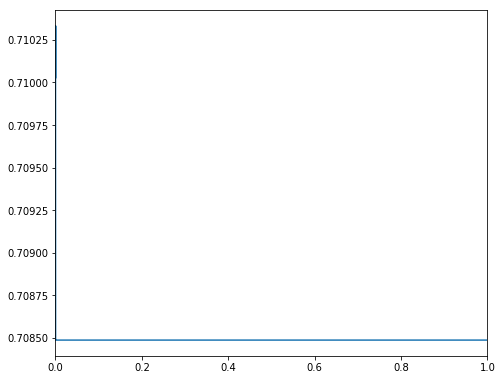

In [160]:
# graph
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
scores = grid.cv_results_['split1_test_score'].reshape(len(C_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)

plt.plot(C_range, scores)
plt.xlim(0,1)


# Multi-Layer-Perceptron with parameter variation of alpha

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

In [ ]:
#Advice: use a logaritmic range for parameter α and a sufficiently large
#number of model parameters
#generates array of logarithmically placed values of length 200, between .01 and 1000

#Alpha is a parameter for regularization term, aka penalty term, 
#that combats overfitting by limiting the size of the weights. 
#Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights.



alphas = np.geomspace(.0000000001, 1000, 200)

In [ ]:
x, y = otherdata, install_labels

In [ ]:
##THIS BLOCK OF CODE TAKES A VERY LONG TIME TO RUN

train_scores, test_scores = validation_curve(MLPClassifier(activation='logistic', hidden_layer_sizes=(100,), max_iter=500, random_state=1,
                solver='lbfgs', verbose=True), x, y, param_name="alpha", param_range=alphas, scoring="accuracy", n_jobs=1)

In [ ]:
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

In [ ]:
#plot curves
plt.figure(figsize=(20, 6))


plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, mean_train_scores,label='train score')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.title('accuracy scores as a function of alpha')
plt.axis('tight')

ax.plot(alphas, mean_test_scores, label='validation score')


plt.legend()
plt.show()
